In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
   
# XGBoost (external)
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("smart_retail_dataset_3.csv")

In [3]:
df.head()

,customer_id,age,gender,city_tier,income_level,avg_monthly_spend,visit_frequency,preferred_category,discount_usage_rate,loyalty_points,last_purchase_days,app_usage_minutes,complaints_count,product_view_count,high_margin_purchase
0,1,56,Male,Tier 1,High,7361.677559,3,Electronics,0.108056,4403,107,69.076279,3,11,1
1,2,69,Female,Tier 1,Low,6345.572084,4,Home,0.439788,5108,166,68.548072,0,11,0
2,3,46,Female,Tier 3,High,6144.024506,6,Groceries,0.454589,3516,123,51.811021,0,12,1
3,4,32,Female,Tier 1,Medium,6050.252303,5,Home,0.445622,4519,134,106.882540,0,9,0
4,5,60,Male,Tier 2,Medium,6420.164900,9,Home,0.180177,3447,2,77.854805,2,12,0


In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           10000 non-null  int64  
 1   age                   10000 non-null  int64  
 2   gender                10000 non-null  object 
 3   city_tier             10000 non-null  object 
 4   income_level          10000 non-null  object 
 5   avg_monthly_spend     10000 non-null  float64
 6   visit_frequency       10000 non-null  int64  
 7   preferred_category    10000 non-null  object 
 8   discount_usage_rate   10000 non-null  float64
 9   loyalty_points        10000 non-null  int64  
 10  last_purchase_days    10000 non-null  int64  
 11  app_usage_minutes     10000 non-null  float64
 12  complaints_count      10000 non-null  int64  
 13  product_view_count    10000 non-null  int64  
 14  high_margin_purchase  10000 non-null  int64  
dtypes: float64(3), int64

In [5]:
df.describe()

,customer_id,age,avg_monthly_spend,visit_frequency,discount_usage_rate,loyalty_points,last_purchase_days,app_usage_minutes,complaints_count,product_view_count,high_margin_purchase
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,43.539400,5486.103264,4.991100,0.285417,3004.387200,90.81920,70.167868,0.978800,12.079800,0.356100
std,2886.89568,14.911636,1510.514166,2.224661,0.157267,1736.060118,51.48438,14.898872,0.995314,3.439217,0.478869
min,1.00000,18.000000,1000.000000,0.000000,0.001036,0.000000,1.00000,17.964938,0.000000,2.000000,0.000000
25%,2500.75000,31.000000,4448.647357,3.000000,0.162313,1508.000000,46.00000,60.150632,0.000000,10.000000,0.000000
50%,5000.50000,43.000000,5477.955365,5.000000,0.265412,3004.000000,91.00000,70.104142,1.000000,12.000000,0.000000
75%,7500.25000,56.000000,6521.681221,6.000000,0.386902,4514.250000,135.00000,80.057295,2.000000,14.000000,1.000000
max,10000.00000,69.000000,11091.750017,17.000000,0.889663,5999.000000,179.00000,122.639018,6.000000,27.000000,1.000000


In [6]:
df.isnull().sum()

customer_id             0
age                     0
gender                  0
city_tier               0
income_level            0
avg_monthly_spend       0
visit_frequency         0
preferred_category      0
discount_usage_rate     0
loyalty_points          0
last_purchase_days      0
app_usage_minutes       0
complaints_count        0
product_view_count      0
high_margin_purchase    0
dtype: int64

In [7]:
df['high_margin_purchase'].value_counts(normalize=True)# 0- non target, # 1-target

high_margin_purchase
0    0.6439
1    0.3561
Name: proportion, dtype: float64

In [8]:
df = df.drop_duplicates()

# Identify categorical and numerical features

In [9]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)



Numerical Features: ['customer_id', 'age', 'avg_monthly_spend', 'visit_frequency', 'discount_usage_rate', 'loyalty_points', 'last_purchase_days', 'app_usage_minutes', 'complaints_count', 'product_view_count', 'high_margin_purchase']
Categorical Features: ['gender', 'city_tier', 'income_level', 'preferred_category']


# EDA +VISUALIZATION

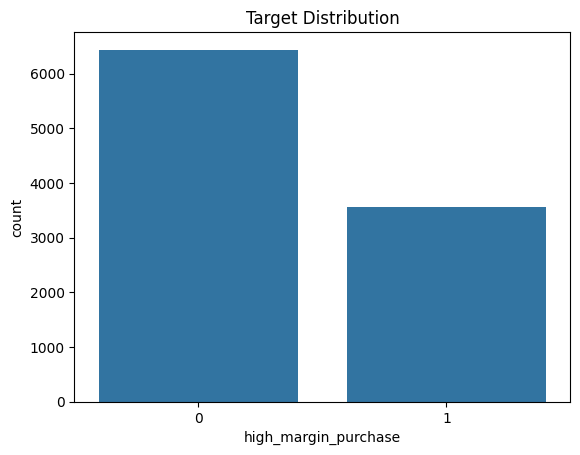

In [10]:
sns.countplot(x='high_margin_purchase', data=df)
plt.title("Target Distribution")
plt.show()


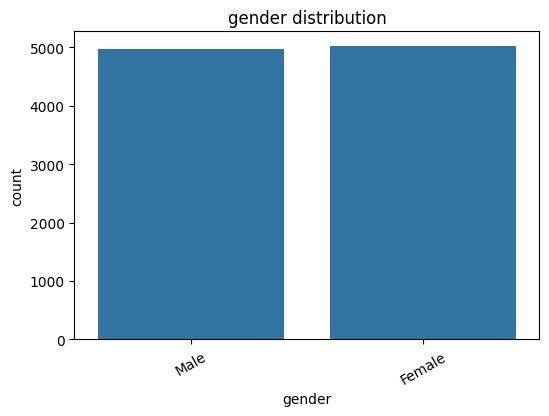

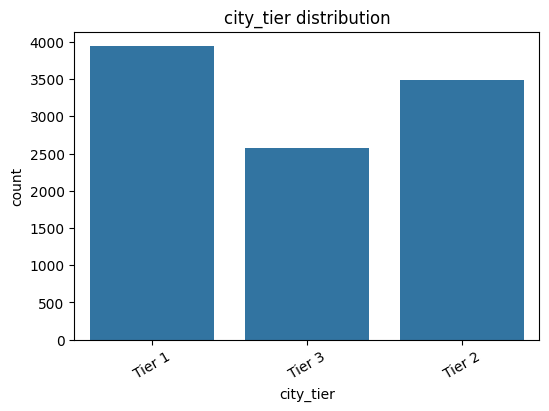

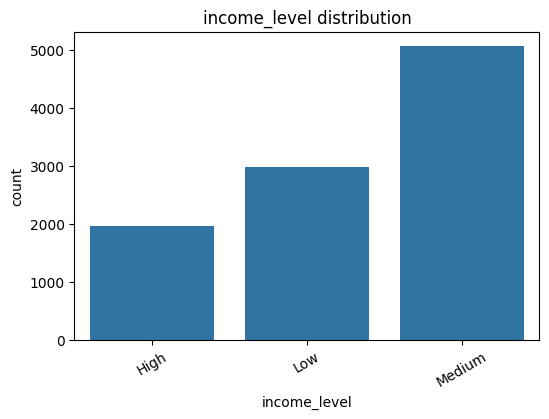

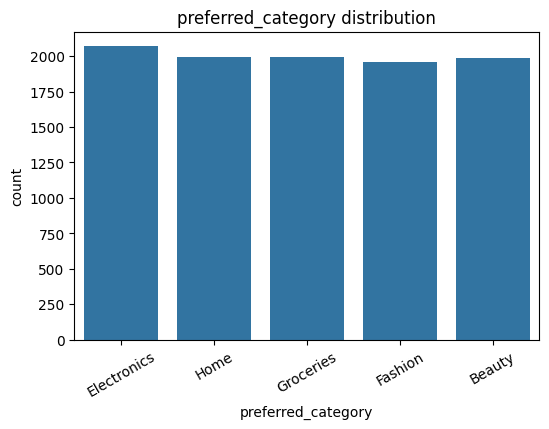

In [11]:
cat_cols = ['gender', 'city_tier', 'income_level', 'preferred_category']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"{col} distribution")
    plt.xticks(rotation=30)
    plt.show()


## Income vs Purchase

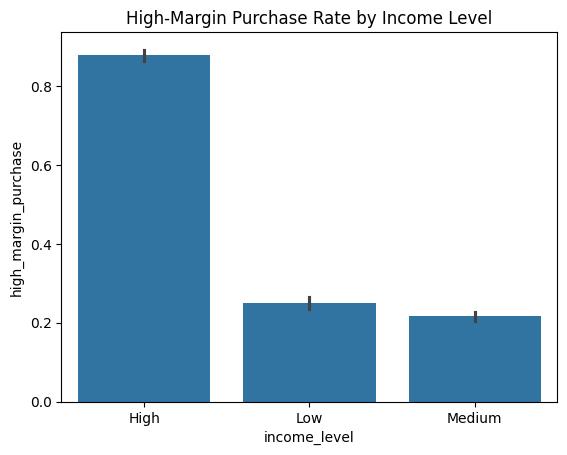

In [12]:
sns.barplot(x='income_level', y='high_margin_purchase', data=df)
plt.title("High-Margin Purchase Rate by Income Level")
plt.show()


In [ ]:
#outliers

Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_counts = ((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound)).sum()
outlier_counts


customer_id               0
age                       0
avg_monthly_spend        61
visit_frequency         137
discount_usage_rate      69
loyalty_points            0
last_purchase_days        0
app_usage_minutes        76
complaints_count          6
product_view_count      135
high_margin_purchase      0
dtype: int64

In [17]:
outlier_percentage = (outlier_counts / len(df)) * 100
outlier_percentage


customer_id             0.00
age                     0.00
avg_monthly_spend       0.61
visit_frequency         1.37
discount_usage_rate     0.69
loyalty_points          0.00
last_purchase_days      0.00
app_usage_minutes       0.76
complaints_count        0.06
product_view_count      1.35
high_margin_purchase    0.00
dtype: float64

# FEATURE ENGINNERING

In [18]:
df['engagement_score'] = df['app_usage_minutes'] + df['product_view_count']

df['recency_score'] = 1 / (1 + df['last_purchase_days'])

df['value_score'] = df['avg_monthly_spend'] * df['visit_frequency']

df['discount_dependency'] = (
    df['discount_usage_rate'] * df['visit_frequency']
)

df['complaint_rate'] = (
    df['complaints_count'] / (df['visit_frequency'] + 1)
)




In [19]:
df = df.drop(columns=['customer_id'])


In [20]:
df.head()

,age,gender,city_tier,income_level,avg_monthly_spend,visit_frequency,preferred_category,discount_usage_rate,loyalty_points,last_purchase_days,app_usage_minutes,complaints_count,product_view_count,high_margin_purchase,engagement_score,recency_score,value_score,discount_dependency,complaint_rate
0,56,Male,Tier 1,High,7361.677559,3,Electronics,0.108056,4403,107,69.076279,3,11,1,80.076279,0.009259,22085.032676,0.324169,0.75
1,69,Female,Tier 1,Low,6345.572084,4,Home,0.439788,5108,166,68.548072,0,11,0,79.548072,0.005988,25382.288335,1.759152,0.00
2,46,Female,Tier 3,High,6144.024506,6,Groceries,0.454589,3516,123,51.811021,0,12,1,63.811021,0.008065,36864.147034,2.727537,0.00
3,32,Female,Tier 1,Medium,6050.252303,5,Home,0.445622,4519,134,106.882540,0,9,0,115.882540,0.007407,30251.261516,2.228111,0.00
4,60,Male,Tier 2,Medium,6420.164900,9,Home,0.180177,3447,2,77.854805,2,12,0,89.854805,0.333333,57781.484100,1.621597,0.20


## Separate features & target

In [21]:
X = df.drop(columns=['high_margin_purchase'])
y = df['high_margin_purchase']


## One-Hot Encoding

In [22]:
X_encoded = pd.get_dummies(
    X,
    columns=cat_cols,
    drop_first=True
)


## Train–Test Split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


### Check imbalance

In [24]:
y_train.value_counts()
y_train.value_counts(normalize=True)



high_margin_purchase
0    0.643875
1    0.356125
Name: proportion, dtype: float64

### Apply class weight

In [25]:
pos_weight = (len(y_train) - y_train.sum()) / y_train.sum()
pos_weight


1.808002808002808

# MODEL TRAINING AND MODEL EVALUVATION

## 1.LOGISTIC REGRESSION

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [28]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

y_pred = log_model.predict(X_test_scaled)
y_prob = log_model.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.876
F1 Score: 0.8236130867709816
ROC-AUC: 0.9459106096029033
Confusion Matrix:
 [[1173  115]
 [ 133  579]]


## 2. random forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=12, min_samples_split=5, n_estimators=300,
                       n_jobs=-1, random_state=42)

In [30]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results
Accuracy: 0.991
F1 Score: 0.9874476987447699
ROC-AUC: 0.999407887849815
Confusion Matrix:
 [[1274   14]
 [   4  708]]


In [31]:
import pandas as pd

rf_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

rf_importance.head(10)


,feature,importance
1,avg_monthly_spend,0.235051
18,income_level_Medium,0.143902
17,income_level_Low,0.126130
4,loyalty_points,0.118641
6,app_usage_minutes,0.073542
9,engagement_score,0.055268
11,value_score,0.052975
3,discount_usage_rate,0.033181
13,complaint_rate,0.029661
2,visit_frequency,0.024647


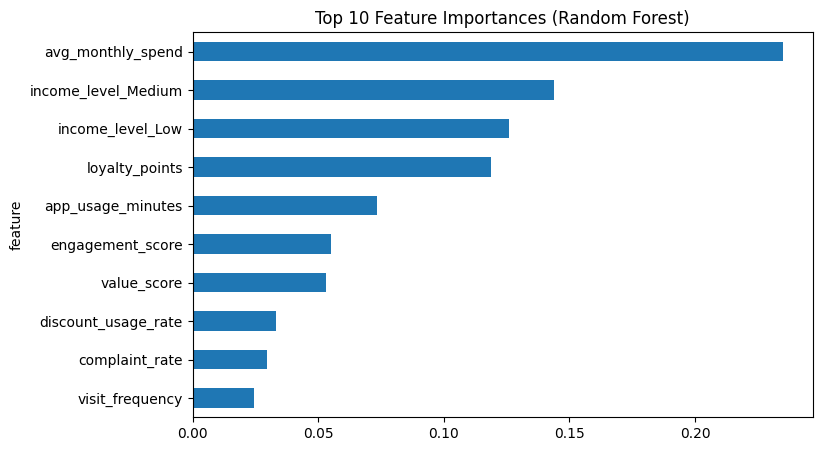

In [32]:
import matplotlib.pyplot as plt

rf_importance.head(10).plot(
    x='feature',
    y='importance',
    kind='barh',
    figsize=(8,5),
    legend=False
)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


## EVALUATION CODE (Both Models)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
)

# =========================
# Predictions
# =========================

# Logistic
y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]

# Random Forest
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


# =========================
# Evaluation Function
# =========================

def evaluate_model(name, y_test, y_pred, y_prob):
    print(f"\n===== {name} Performance =====")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print("F1 Score:", round(f1_score(y_test, y_pred), 3))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 3))
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

# Evaluate
evaluate_model("Logistic Regression", y_test, y_pred_log, y_prob_log)
evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf)



===== Logistic Regression Performance =====
Accuracy: 0.876
F1 Score: 0.824
ROC-AUC: 0.946

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1288
           1       0.83      0.81      0.82       712

    accuracy                           0.88      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.88      0.88      0.88      2000


===== Random Forest Performance =====
Accuracy: 0.991
F1 Score: 0.987
ROC-AUC: 0.999

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1288
           1       0.98      0.99      0.99       712

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



## ROC CURVE (Both Models Together)

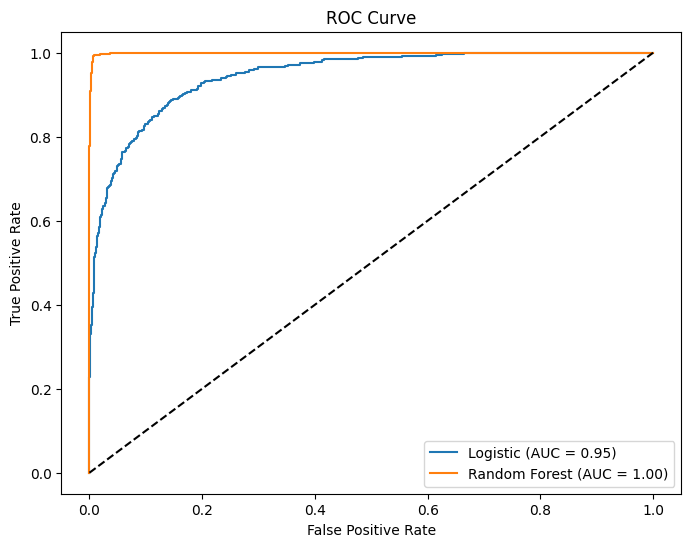

In [34]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label="Logistic (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_log)))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_rf)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## CONFUSION MATRIX

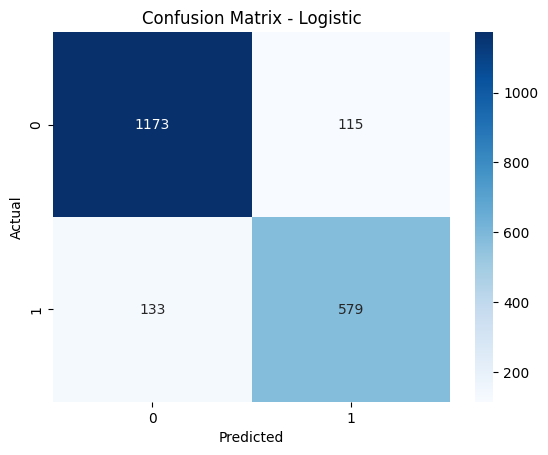

In [35]:
#Logistic

cm_log = confusion_matrix(y_test, y_pred_log)

sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Random Forest

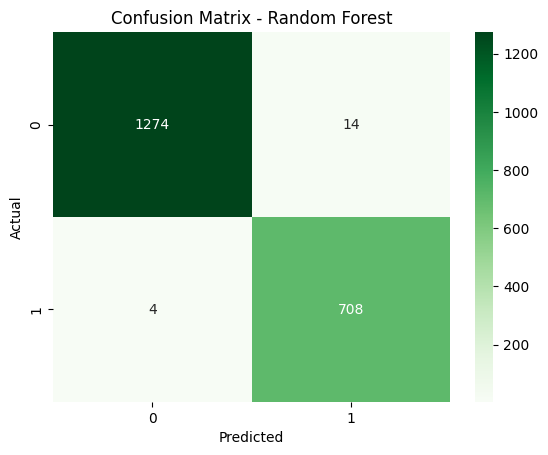

In [36]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## INFERENCE TIME

In [37]:

# Take single sample
sample = X_test.iloc[[0]]

start = time.time()
rf_model.predict(sample)
end = time.time()

inference_time_ms = (end - start) * 1000
print("Random Forest Inference Time (ms):", round(inference_time_ms, 4))


Random Forest Inference Time (ms): 46.2525


In [38]:
sample_scaled = scaler.transform(sample)

start = time.time()
log_model.predict(sample_scaled)
end = time.time()

print("Logistic Inference Time (ms):", round((end-start)*1000, 4))


Logistic Inference Time (ms): 1.4811


## FINAL PERFORMANCE SUMMARY TABLE

In [39]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_rf)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_log),
        roc_auc_score(y_test, y_prob_rf)
    ]
})

print(results)


                 Model  Accuracy  F1 Score   ROC-AUC
0  Logistic Regression     0.876  0.823613  0.945911
1        Random Forest     0.991  0.987448  0.999408


## Save Random Forest Model

In [40]:
import joblib

joblib.dump(rf_model, "random_forest_model.pkl")

print("Random Forest model saved successfully!")


Random Forest model saved successfully!


In [43]:
joblib.dump(le_dict, "label_encoders.pkl")



['label_encoders.pkl']

In [44]:

joblib.dump(le_dict, "label_encoders.pkl")


['label_encoders.pkl']